In [10]:
import pickle as pkl 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
from nltk.stem import *
from nltk.corpus import stopwords

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
data=pd.read_csv('dataset\emails.csv')
data

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


Text(0.5, 1.0, 'Spam Frequencies')

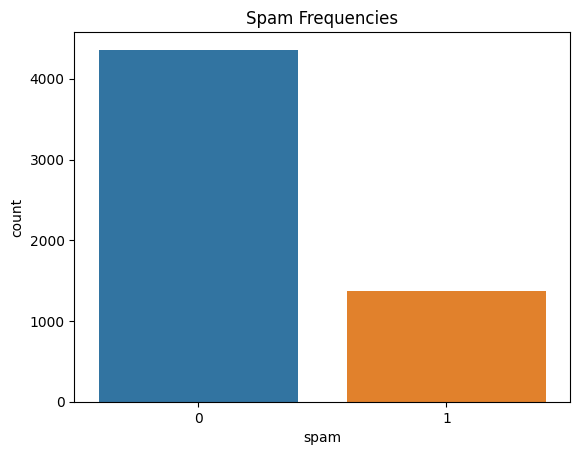

In [14]:
plt.figure(dpi=100)
sns.countplot(x=data['spam'])
plt.title('Spam Frequencies')

In [15]:
data.drop_duplicates(inplace=True)
data.isnull().sum()

text    0
spam    0
dtype: int64

In [16]:
# Removing punctuation and stopwords from data 
# Tokenizing it into stems
def pre_process(text):
    no_punct=[c for c in text if c not in string.punctuation]
    no_punct=''.join(no_punct)
    stemmer = SnowballStemmer("english")
    words=[ stemmer.stem(w) for w in no_punct.split() if w.lower() not in stopwords.words('english')]
    return words

In [17]:
# Fitting the CountVectorizer
vect= CountVectorizer(analyzer=pre_process).fit_transform(data['text'])
with open('vectorizer.pkl','wb') as f:
    pkl.dump(vect,f)

In [18]:
# Split the data into training and testing sets 
X_train, X_test, y_train, y_test=train_test_split(vect,data['spam'],test_size=0.2, random_state=48)


In [19]:
model=MultinomialNB()
model.fit(X_train,y_train)
with open('model.pkl','wb') as f:
    pkl.dump(model,f)

In [20]:
y_pred=model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100

99.29762949956101

In [21]:
# Model Evaluation | Classification report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.99      1.00       856\n           1       0.98      1.00      0.99       283\n\n    accuracy                           0.99      1139\n   macro avg       0.99      0.99      0.99      1139\nweighted avg       0.99      0.99      0.99      1139\n'

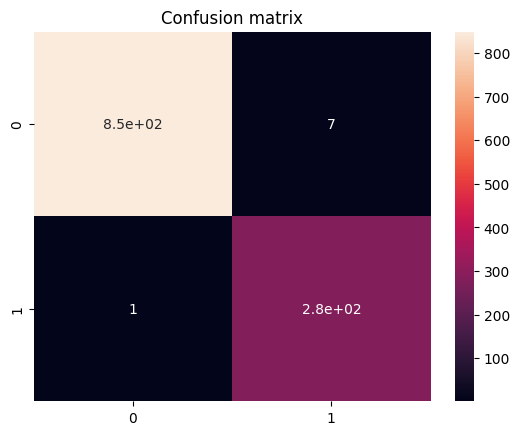

In [22]:
cm= confusion_matrix(y_test,y_pred)
plt.figure
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()

GaussianNB
****Results****
Accuracy: 95.7858%
MultinomialNB
****Results****
Accuracy: 99.2976%
BernoulliNB
****Results****
Accuracy: 99.2976%
ComplementNB
****Results****
Accuracy: 99.2976%


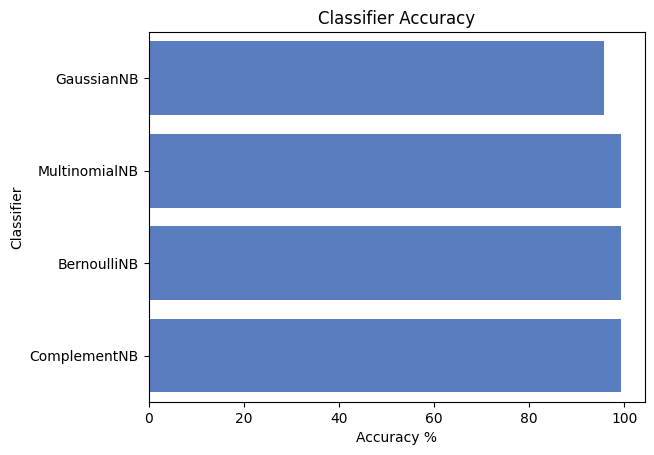

In [23]:
# Other Naive Bayes models
from sklearn.metrics import accuracy_score, log_loss
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB
classifiers = [
    GaussianNB(),
    MultinomialNB(),
    BernoulliNB(),
    ComplementNB(),               
                  ]
 
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)
X_dense = vect.toarray()

X_train, X_test, y_train, y_test=train_test_split(X_dense,data['spam'],test_size=0.2, random_state=48)
for clf in classifiers:
    
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    ll=log_loss(y_test,train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    print("="*30)

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")
 
plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()